## Overview

The NFL Combine is an opportunity for College Football players to show off their skills to the NFL scouts in the hopes of being drafted into the professional league.  A variety of tests are performed, such as the 40-yard dash, vertical jump, and much more for all different positions.  The data for the NFL Combine was found on [Kaggle](https://www.kaggle.com/savvastj/nfl-combine-data).

My goal is to look at the data for wide receivers to determine if there are any hidden groups to determine which players should be drafted.  I will be using a k-means clustering to uncover these hidden groups of wide receivers.

## Proposed Method

For this project I will use a k-means cluster to see if there are any hidden groups in the dataset.  I will try a different combination of inputs, along with using the raw data and scale the data to see if anything can be foud.

In [1]:
#install and import libraries
import sys

!conda install --yes --prefix {sys.prefix} -c districtdatalabs yellowbrick
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

from Notebooks.Functions import *

Solving environment: ...working... done

# All requested packages already installed.



C:\Users\frank\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#read in NFL combine WR file
file = 'Data\\NFL_Combine_WR.csv'
df = pd.read_csv(file, index_col=0)
df.head()

,Ht,Wt,Forty,Vertical
Player,,,,
Plaxico Burress,77,231,4.59,33.0
Kwame Cavil,74,208,4.54,39.5
Chris Cole,72,191,4.37,37.5
Chris Coleman,72,211,4.61,32.5
Laveranues Coles,71,192,4.41,34.0


## Goal 1

Can we find hidden groups within the wide receiver by looking at 40-yard dash and vertical jump results?

We will plot the dataset, use the Calinski Harabasz score to determine the best number of clusters, and display the new information.

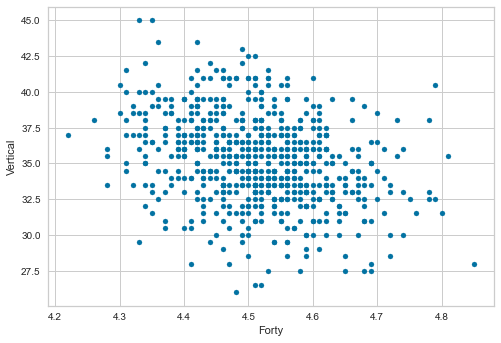

In [3]:
#plot dataset
graph_display(X = df.Forty, y= df.Vertical, labelX='Forty', labely='Vertical')

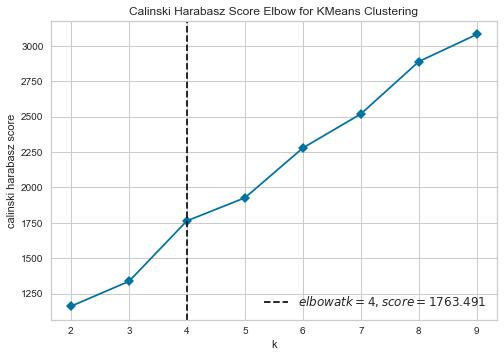

In [4]:
#determine kmeans groups
kmeans_groups(min=2, max=10, df = df[['Forty', 'Vertical']])

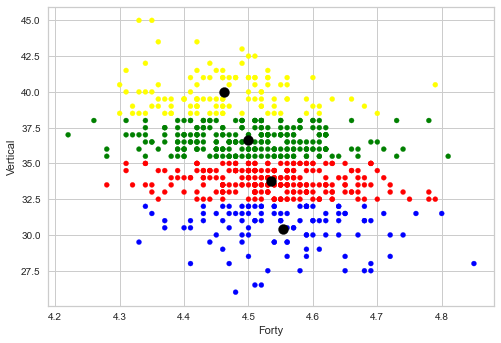

In [5]:
#4 groupings were deemed appropriate based on the score about
#plot kmeans groups
k_means, y_hat = kmeans_clust (n_clusters=4, df=df[['Forty', 'Vertical']])


df['Predict_FortyVertical'] = y_hat

LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'yellow',
                   2: 'blue',
                   3: 'green'
                   }


label_color = [LABEL_COLOR_MAP[l] for l in y_hat]
cl_centers = k_means.cluster_centers_

graph_display(X = df.Forty, y= df.Vertical, labelX='Forty', labely='Vertical', pred=label_color, c1X=cl_centers[:, 0], c1y=cl_centers[:, 1])


In [6]:
df

,Ht,Wt,Forty,Vertical,Predict_FortyVertical
Player,,,,,
Plaxico Burress,77,231,4.59,33.0,0
Kwame Cavil,74,208,4.54,39.5,1
Chris Cole,72,191,4.37,37.5,3
Chris Coleman,72,211,4.61,32.5,0
Laveranues Coles,71,192,4.41,34.0,0
...,...,...,...,...,...
Jester Weah,74,211,4.43,38.0,3
Karaun White,73,206,4.52,33.5,0
Jake Wieneke,76,221,4.67,34.0,0


## Results

Based on looking at the plotted groups and the dataset, the vertical jump results was the main factor used to determine these different groups.  The 40-yard dash to not seem to play any factor into the clustering.

This does not really show any hidden groups, aside for how high groups can jump.

## Goal 2

Can we find hidden groups within the wide receiver by looking at 40-yard dash and vertical jump results after implementing a standard scaler?

We will plot the dataset, use the Calinski Harabasz score to determine the best number of clusters, and display the new information.

In [7]:
#scale data using standard scaler
sc = StandardScaler()
sc.fit(df[['Forty', 'Vertical']])
df_std = sc.transform(df[['Forty', 'Vertical']])
df_std

array([[ 0.75684299, -0.7217416 ],
       [ 0.25588362,  1.37962685],
       [-1.44737824,  0.73305195],
       ...,
       [ 1.55837798, -0.39845414],
       [ 0.35607549,  0.57140822],
       [ 0.15569175, -0.56009787]])

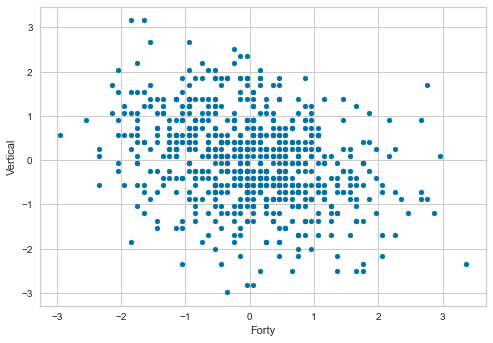

In [8]:
#plot dataset
graph_display(X = df_std[:, 0], y= df_std[:, 1], labelX='Forty', labely='Vertical')

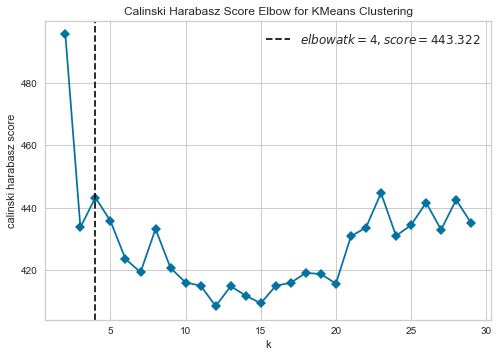

In [9]:
#determine kmeans groups
kmeans_groups(min=2, max=30, df = df_std)

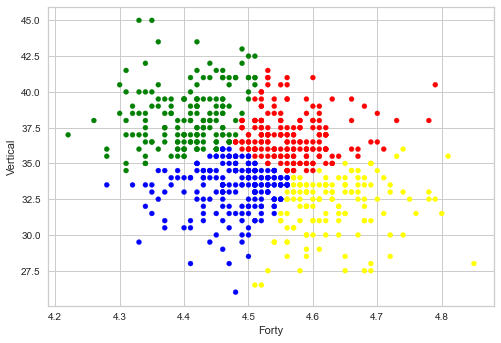

In [10]:
#4 groupings were deemed appropriate based on the score about
#plot dataset
k_means, y_hat = kmeans_clust (n_clusters=4, df=df_std)


df['Predict_FortyVerticalSS'] = y_hat

LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'yellow',
                   2: 'blue',
                   3: 'green'
                   }


label_color = [LABEL_COLOR_MAP[l] for l in y_hat]

graph_display(X = df.Forty, y= df.Vertical, labelX='Forty', labely='Vertical', pred=label_color)



In [11]:
df

,Ht,Wt,Forty,Vertical,Predict_FortyVertical,Predict_FortyVerticalSS
Player,,,,,,
Plaxico Burress,77,231,4.59,33.0,0,1
Kwame Cavil,74,208,4.54,39.5,1,0
Chris Cole,72,191,4.37,37.5,3,3
Chris Coleman,72,211,4.61,32.5,0,1
Laveranues Coles,71,192,4.41,34.0,0,2
...,...,...,...,...,...,...
Jester Weah,74,211,4.43,38.0,3,3
Karaun White,73,206,4.52,33.5,0,2
Jake Wieneke,76,221,4.67,34.0,0,1


## Results

By scaling the data, we still get 4 groups just like goal 1, however these groups are not broken down purely based on the vertical jump.  We can clearly see that the both inputs were taken into account more.  

The groupings appear to be as such:

Top Left - Run slower, but jump higher
Bottom Left - Run slower and cannot jump as high
Top Right - Run faster and jump higher
Bottom Right - Run faster, but cannot jump as high

Because of this easy breakdown, a team can determine their needs in a wide reciever.  Arguably, you would want a wide reciver that is fast and can jump high (top right), however, depending on a teams needs and stragetigies they may want a player from a different category.  In addition, it is common for players to join the NFL and switch the positions.  For example a wide receiver may be converted to a tightend or cornerback.  These groupings can help a team deterime if they want to convert a player as well.

# Goal 3
Can we find hidden groups within the widereceivers by looking at height, weight, 40-yard dash, and vertical jumps for each wide receiver?

We will use the Calinski Harabasz score to determine the best number of clusters and display the new information.

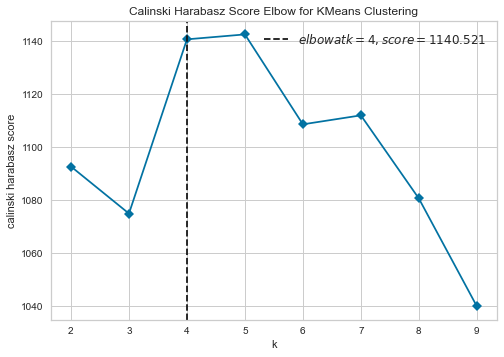

In [12]:
#determine kmeans groups
kmeans_groups(min=2, max=10, df = df[['Ht', 'Wt', 'Forty', 'Vertical']])

In [13]:
#4 groupings were deemed appropriate based on the score about
#plot dataset
k_means, y_hat = kmeans_clust (n_clusters=4, df=df[['Ht', 'Wt', 'Forty', 'Vertical']])


df['Predict_All'] = y_hat

In [14]:
df

,Ht,Wt,Forty,Vertical,Predict_FortyVertical,Predict_FortyVerticalSS,Predict_All
Player,,,,,,,
Plaxico Burress,77,231,4.59,33.0,0,1,0
Kwame Cavil,74,208,4.54,39.5,1,0,2
Chris Cole,72,191,4.37,37.5,3,3,1
Chris Coleman,72,211,4.61,32.5,0,1,2
Laveranues Coles,71,192,4.41,34.0,0,2,1
...,...,...,...,...,...,...,...
Jester Weah,74,211,4.43,38.0,3,3,2
Karaun White,73,206,4.52,33.5,0,2,2
Jake Wieneke,76,221,4.67,34.0,0,1,0


## Results

Based on looking at the dataset, the players' weight  was the main factor used to determine these different groups.  The other features did provide any significance to clustering.

This did not provide any meaningful hidden groups.

# Goal 4

Can we find hidden groups within the wide receivers by looking at height, weight, 40-yard dash, and vertical jumps for each widereceiver after implementing a standard scaler?

We will use the silhouette score to determine the best number of clusters and display the new information.

The reason I am using silohoutte instead of the Calinski Harabasz score is because the Calinski Harabasz was unable to a number of clusters to use.  The silhouette score was able to determine a cluster number, however it is not consistent everytime it is run.

In [15]:
#scale data using standard scaler
sc = StandardScaler()
sc.fit(df[['Ht', 'Wt', 'Forty', 'Vertical']])
df_std = sc.transform(df[['Ht', 'Wt', 'Forty', 'Vertical']])
df_std

array([[ 1.90045383,  1.95399987,  0.75684299, -0.7217416 ],
       [ 0.56285671,  0.4017009 ,  0.25588362,  1.37962685],
       [-0.32887471, -0.74565052, -1.44737824,  0.73305195],
       ...,
       [ 1.45458812,  1.27908727,  1.55837798, -0.39845414],
       [ 0.56285671, -0.34070296,  0.35607549,  0.57140822],
       [ 1.00872242,  0.87413971,  0.15569175, -0.56009787]])

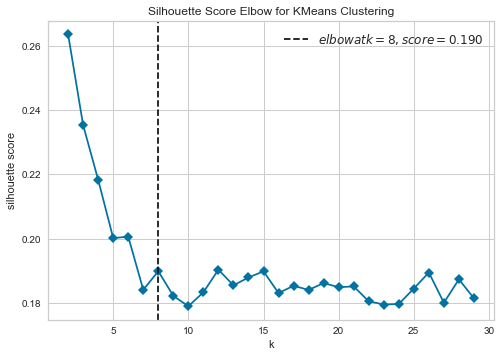

In [20]:
#determine kmeans groups
kmeans_groups(min=2, max=30, df = df_std, metric = 'silhouette')

In [21]:
#10 groupings were deemed appropriate based on the score above, however there is a different result, so it may be slightly different
k_means, y_hat = kmeans_clust (n_clusters=10, df=df_std)

df['Predict_AllSS'] = y_hat

In [18]:
df

,Ht,Wt,Forty,Vertical,Predict_FortyVertical,Predict_FortyVerticalSS,Predict_All,Predict_AllSS
Player,,,,,,,,
Plaxico Burress,77,231,4.59,33.0,0,1,0,9
Kwame Cavil,74,208,4.54,39.5,1,0,2,2
Chris Cole,72,191,4.37,37.5,3,3,1,8
Chris Coleman,72,211,4.61,32.5,0,1,2,5
Laveranues Coles,71,192,4.41,34.0,0,2,1,3
...,...,...,...,...,...,...,...,...
Jester Weah,74,211,4.43,38.0,3,3,2,4
Karaun White,73,206,4.52,33.5,0,2,2,1
Jake Wieneke,76,221,4.67,34.0,0,1,0,9


## Results

This dataset was a little strange.  I attempted to use the Calinski Harabasz score, however it did not find a number of clusters to use.  I then attempted to use the silhouette score.  This was able to find a number of clusters, however, ever time it is rerun with the exact same parameters, the output shifts slightly.  With this being said, I used 10 clusters, however, neither scoring method seemed to be particularly good.

After grouping the data, with 10 clusters, it was very difficult to determine any feasible commonalties between these groups.  In the Goal 4 notebook, I tried plotting many combinations of 2 of the 4 features, to see if this helped identity any reasons it was grouped this way, however, not much could be discerned from the graphs.

## Conclusion

Overall, using a standard scaler on the 40-yard dash and vertical jump feautres provided the most useful and interesting clustering.  The data was clusterd in such a way that we could really see clear groups that performed better to worse on these categories.  With this simple clustering, teams could better determine, which players would suit their needs as widereciver, as well as seeing if these players could be converted to other positions based on their needs.

In [19]:
#export file to csv
file = 'Data\\Predict.csv'
df.to_csv(file)